# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

2021-12-08 00:39:16.236820: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [6]:
train_dataset = get_train_input("./solution/pipeline_new.config")

2021-12-08 00:40:07.097818: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-12-08 00:40:07.191037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 00:40:07.192239: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2021-12-08 00:40:07.192298: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-12-08 00:40:07.207214: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-12-08 00:40:07.207350: I tensorflow/stream_executor/platfo

INFO:tensorflow:Reading unweighted datasets: ['data/processed/train/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord', 'data/processed/train/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord', 'data/processed/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', 'data/processed/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', 'data/processed/train/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord', 'data/processed/train/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord', 'data/processed/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', 'data/processed/train/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord', 'data/processed/train/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord', 'data/processed/train/segment-11126313430116606120_1439_990_145

INFO:tensorflow:Number of filenames to read: 70
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use `tf.cast` instead.


2021-12-08 00:40:31.120664: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-08 00:40:31.164054: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 4200000000 Hz
2021-12-08 00:40:47.202928: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 1 of 2048
2021-12-08 00:40:51.489314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


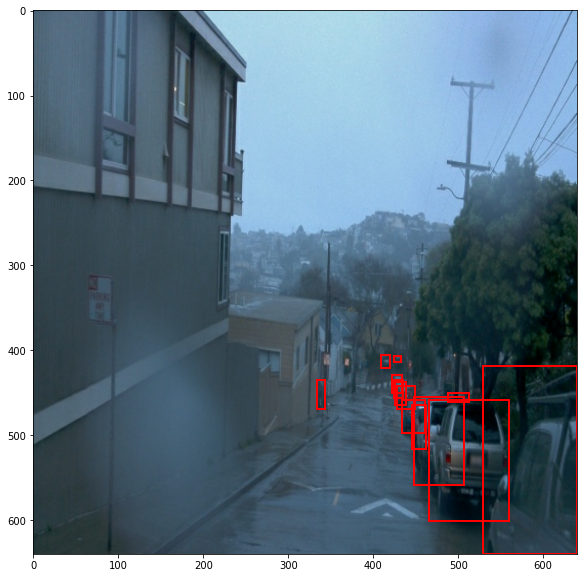

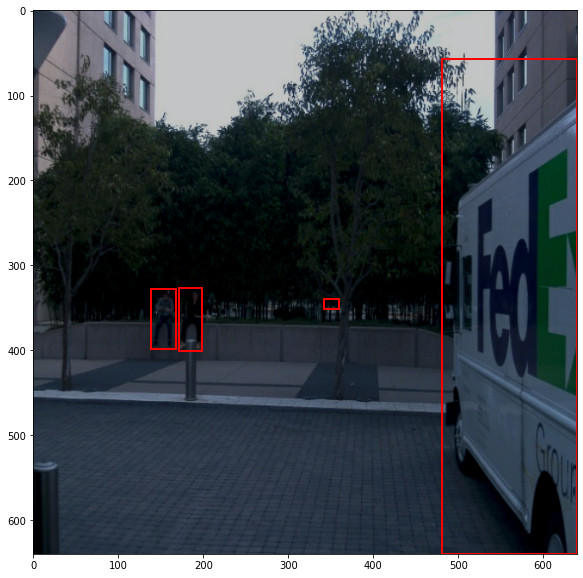

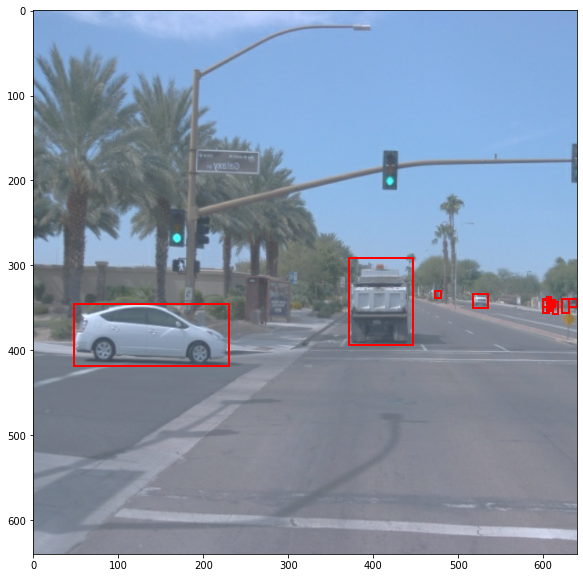

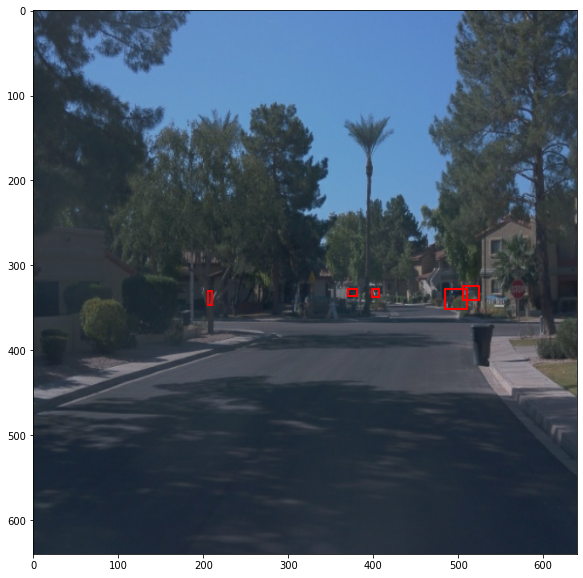

In [7]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)